## Import Libraries

In [115]:
# import libraies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

# import warnings
import warnings
warnings.filterwarnings('ignore')


In [116]:
# import the data
df = pd.read_csv("/Users/apple/Downloads/Project/Iris-Classification-End-to-End-ML-project/dataset/iris.csv")
# show the data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [117]:
# show the tail of the data
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [118]:
df.shape

(150, 5)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [120]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [121]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [122]:
df.select_dtypes(include=['number']).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [123]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [124]:
print(df.species.unique())

['setosa' 'versicolor' 'virginica']


## Exploratory Data Analysis

<Axes: xlabel='species'>

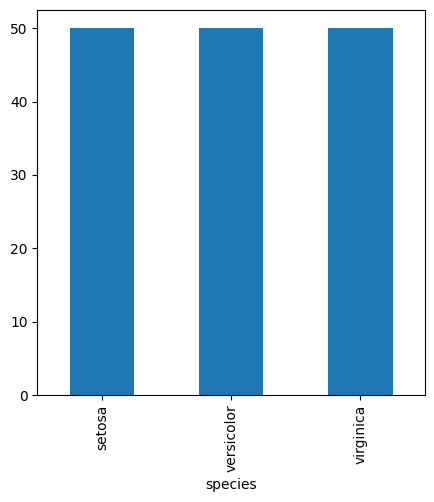

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
df['species'].value_counts().plot(kind='bar')

<Axes: xlabel='sepal_length'>

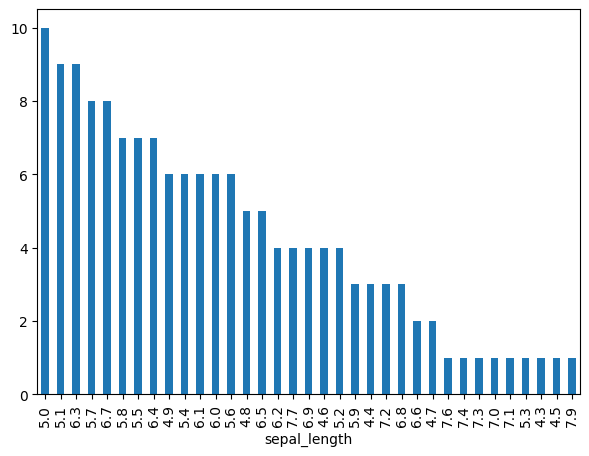

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
df['sepal_length'].value_counts().plot(kind='bar')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

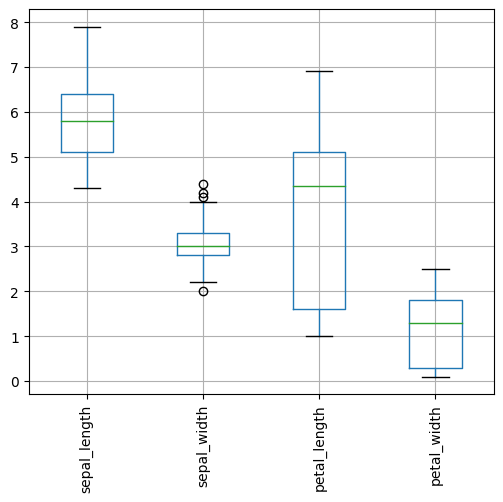

In [128]:
df.boxplot(figsize=(6,5), rot=90)

In [129]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

# Choose numerical columns for outlier removal
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_clean = remove_outliers_iqr(df.copy(), numeric_cols)

print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_clean.shape)


Shape before outlier removal: (150, 5)
Shape after outlier removal: (146, 5)


In [130]:
df_clean.shape

(146, 5)

<Axes: >

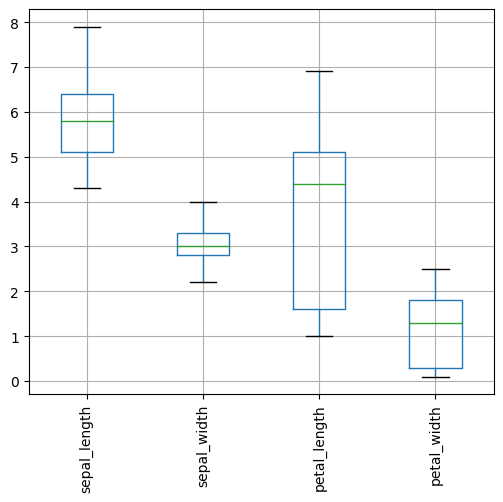

In [131]:
df_clean.boxplot(figsize=(6,5),rot=90)

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

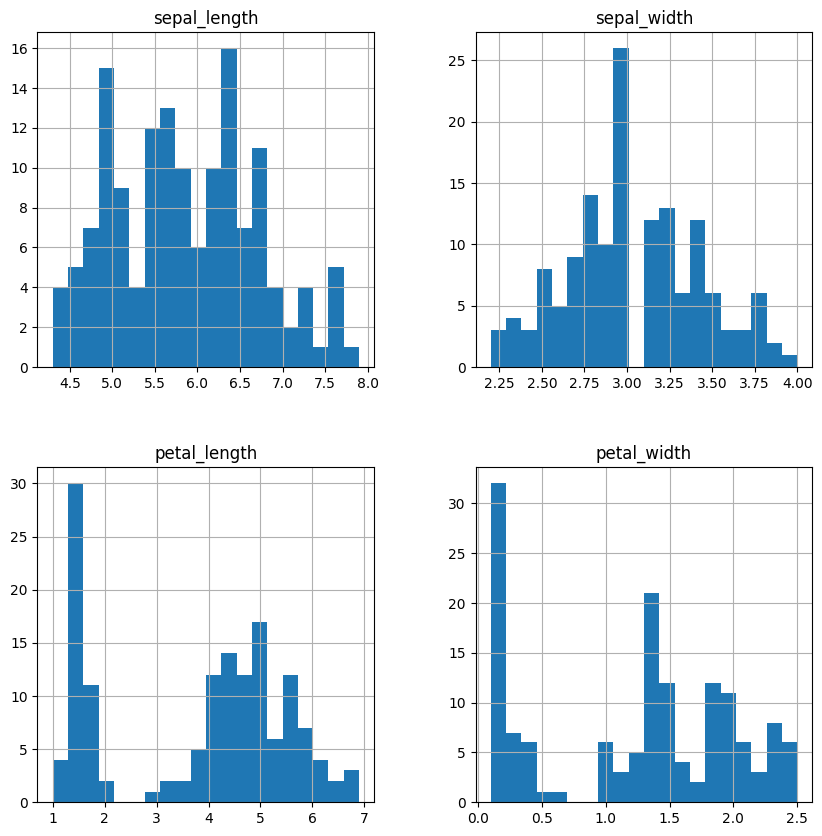

In [132]:
df_clean.hist(figsize=(10,10), bins=20)


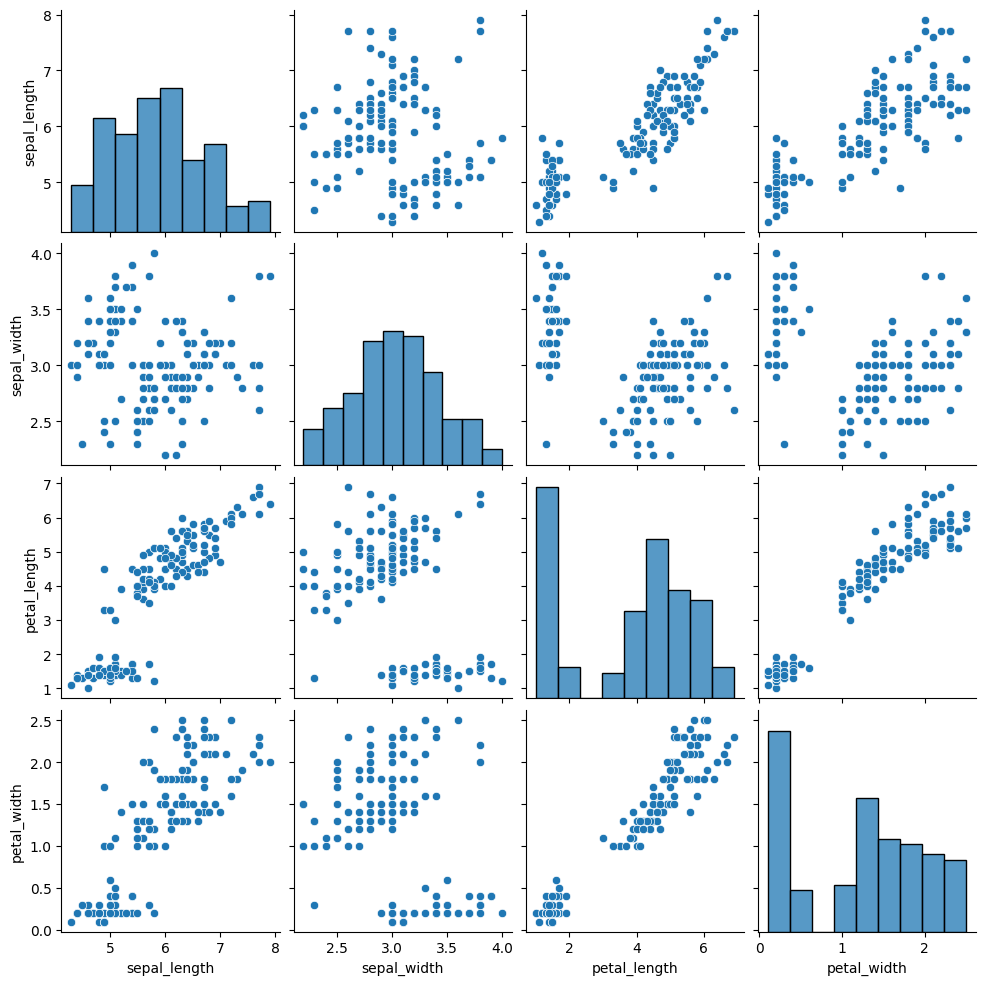

In [133]:
sns.pairplot(df_clean)

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

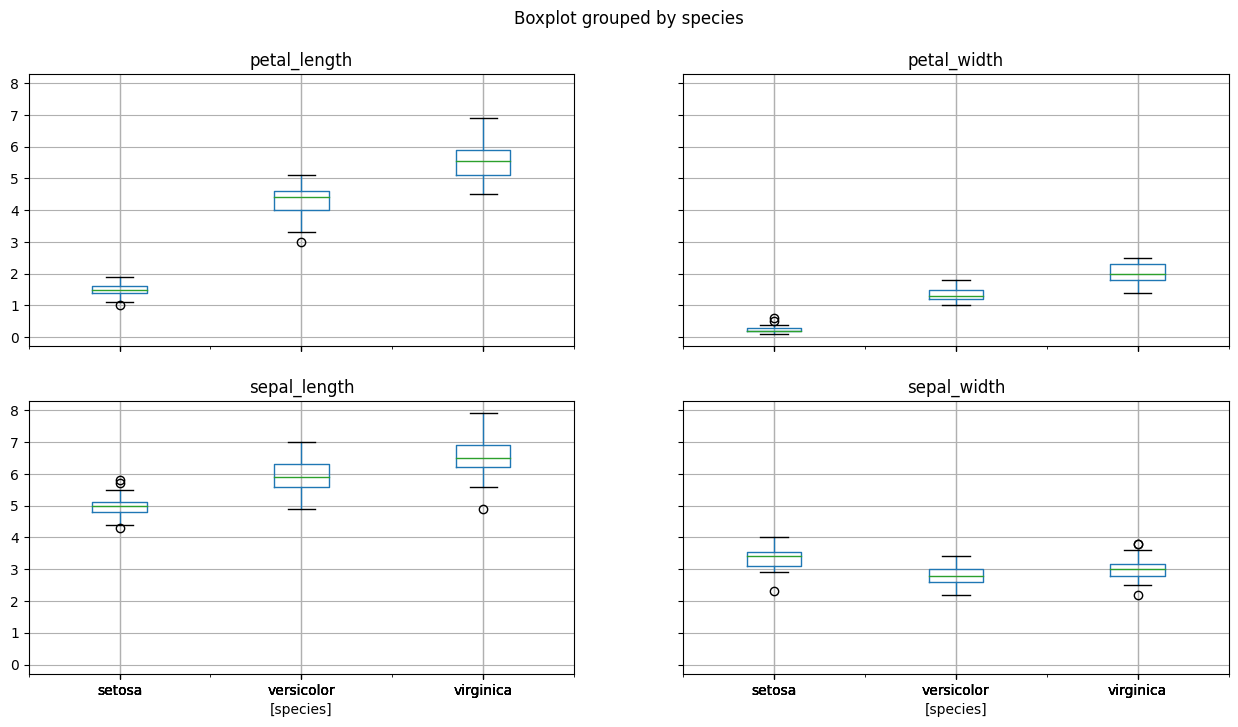

In [134]:
df_clean.boxplot(by='species', figsize=(15, 8))


In [135]:
df_clean.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [136]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean['species'] = le.fit_transform(df_clean['species'])

In [137]:
df_clean

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [138]:
df_clean['species'].value_counts()

species
2    50
1    49
0    47
Name: count, dtype: int64

In [139]:
X = df_clean[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=df_clean['species']

✅ Accuracy Score: 0.9333333333333333

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



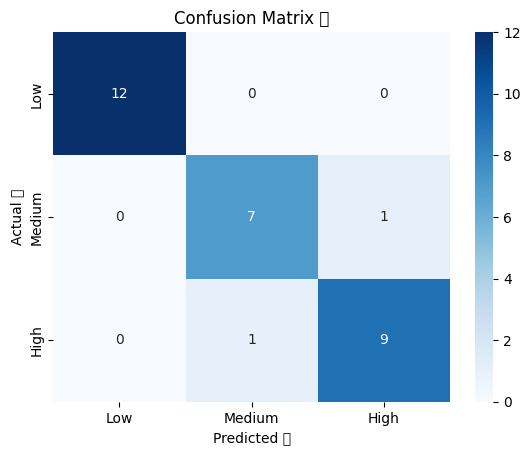


📊 R² Score: 0.9085
📉 Mean Absolute Error (MAE): 0.0667
📉 Mean Squared Error (MSE): 0.0667
📉 Root Mean Squared Error (RMSE): 0.2582


In [140]:
# 🔀 স্টেপ ৪: ট্রেন এবং টেস্ট সেটে ভাগ করছি
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 স্টেপ ৫: মডেল ট্রেইন করছি
model = LogisticRegression(random_state=42)  # 🌲 র‍্যান্ডম ফরেস্ট
model.fit(X_train, y_train)  # 🏋️ মডেল ট্রেইন

# 🧠 স্টেপ ৬: প্রেডিকশন করছি
y_pred = model.predict(X_test)  # 🔮 টেস্ট ডেটা থেকে প্রেডিকশন

# ✅ স্টেপ ৭: একিউরেসি স্কোর বের করছি
accuracy = accuracy_score(y_test, y_pred)  # 📏 কতটা সঠিক প্রেডিকশন হলো
print("✅ Accuracy Score:", accuracy)

# 📋 স্টেপ ৮: ক্লাসিফিকেশন রিপোর্ট
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))  # 🎯 precision, recall, f1-score

# 🔍 স্টেপ ৯: কনফিউশন ম্যাট্রিক্স প্লট করছি
conf_matrix = confusion_matrix(y_test, y_pred)  # 🔄 আসল vs প্রেডিক্টেড
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Low", "Medium", "High"], 
            yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix 🎯")
plt.xlabel("Predicted 📈")
plt.ylabel("Actual 🧾")
plt.show()

# 📊 স্টেপ ১০: রিগ্রেশন টাইপ মেট্রিক হিসাব করছি
r2 = r2_score(y_test, y_pred)  # 📈 কতটা ভালো ফিট করেছে
mae = mean_absolute_error(y_test, y_pred)  # 📉 গড় ভুল
mse = mean_squared_error(y_test, y_pred)  # 📉 স্কোয়ার ভুল
rmse = np.sqrt(mse)  # 📉 রুট স্কোয়ার ভুল

# 🧾 ফলাফল প্রিন্ট করছি
print(f"\n📊 R² Score: {r2:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")


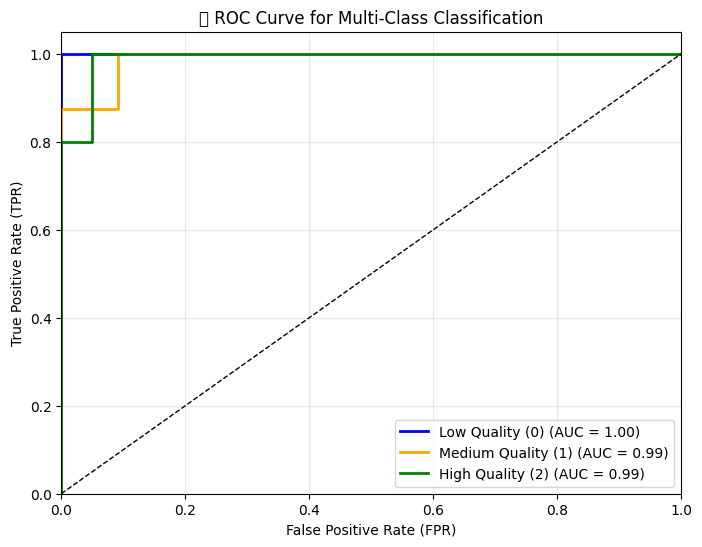

🌈 Macro AUC Score: 0.9929


In [141]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve

# 🔁 স্টেপ ১১: মাল্টিক্লাসের জন্য y টার্গেট ও প্রেডিকশন কে One-hot encode করছি
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = model.predict_proba(X_test)  # প্রেডিকশন প্রোবাবিলিটি (probability)

# 🎯 Multi-class ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])

# 📊 Plotting ROC Curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green']
labels = ['Low Quality (0)', 'Medium Quality (1)', 'High Quality (2)']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('🎯 ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# 🧮 Macro Average AUC (Optional)
macro_auc = roc_auc_score(y_test_binarized, y_pred_proba, average="macro")
print(f"🌈 Macro AUC Score: {macro_auc:.4f}")


✅ Accuracy Score: 0.9666666666666667

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



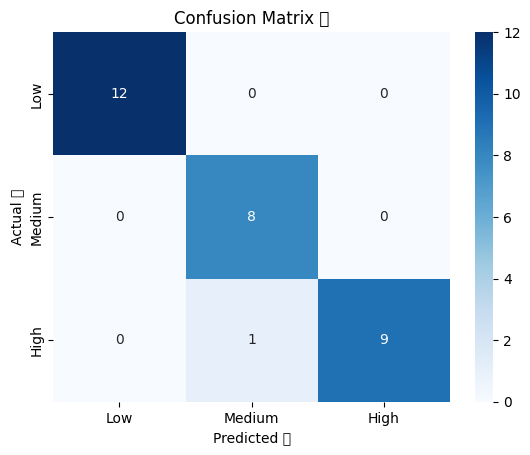


📊 R² Score: 0.9543
📉 Mean Absolute Error (MAE): 0.0333
📉 Mean Squared Error (MSE): 0.0333
📉 Root Mean Squared Error (RMSE): 0.1826


In [142]:

# 🤖 স্টেপ ৫: মডেল ট্রেইন করছি
model = SVC(random_state=42)  # 🌲 র‍্যান্ডম ফরেস্ট
model.fit(X_train, y_train)  # 🏋️ মডেল ট্রেইন

# 🧠 স্টেপ ৬: প্রেডিকশন করছি
y_pred = model.predict(X_test)  # 🔮 টেস্ট ডেটা থেকে প্রেডিকশন

# ✅ স্টেপ ৭: একিউরেসি স্কোর বের করছি
accuracy = accuracy_score(y_test, y_pred)  # 📏 কতটা সঠিক প্রেডিকশন হলো
print("✅ Accuracy Score:", accuracy)

# 📋 স্টেপ ৮: ক্লাসিফিকেশন রিপোর্ট
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))  # 🎯 precision, recall, f1-score

# 🔍 স্টেপ ৯: কনফিউশন ম্যাট্রিক্স প্লট করছি
conf_matrix = confusion_matrix(y_test, y_pred)  # 🔄 আসল vs প্রেডিক্টেড
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Low", "Medium", "High"], 
            yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix 🎯")
plt.xlabel("Predicted 📈")
plt.ylabel("Actual 🧾")
plt.show()

# 📊 স্টেপ ১০: রিগ্রেশন টাইপ মেট্রিক হিসাব করছি
r2 = r2_score(y_test, y_pred)  # 📈 কতটা ভালো ফিট করেছে
mae = mean_absolute_error(y_test, y_pred)  # 📉 গড় ভুল
mse = mean_squared_error(y_test, y_pred)  # 📉 স্কোয়ার ভুল
rmse = np.sqrt(mse)  # 📉 রুট স্কোয়ার ভুল

# 🧾 ফলাফল প্রিন্ট করছি
print(f"\n📊 R² Score: {r2:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")


✅ Accuracy Score: 0.9333333333333333

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



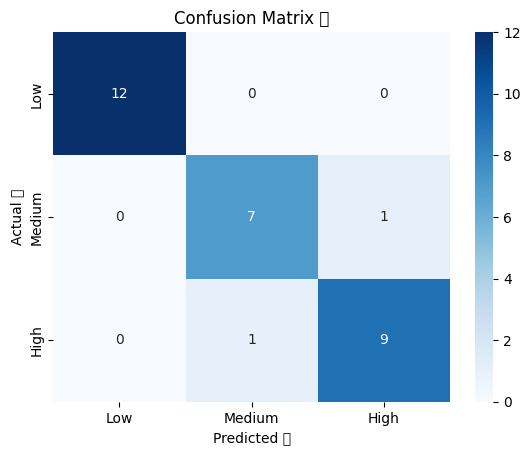


📊 R² Score: 0.9085
📉 Mean Absolute Error (MAE): 0.0667
📉 Mean Squared Error (MSE): 0.0667
📉 Root Mean Squared Error (RMSE): 0.2582


In [143]:
from sklearn.neighbors import KNeighborsClassifier
# 🤖 স্টেপ ৫: মডেল ট্রেইন করছি
model = KNeighborsClassifier(n_neighbors=3)  # 🌲 র‍্যান্ডম ফরেস্ট
model.fit(X_train, y_train)  # 🏋️ মডেল ট্রেইন

# 🧠 স্টেপ ৬: প্রেডিকশন করছি
y_pred = model.predict(X_test)  # 🔮 টেস্ট ডেটা থেকে প্রেডিকশন

# ✅ স্টেপ ৭: একিউরেসি স্কোর বের করছি
accuracy = accuracy_score(y_test, y_pred)  # 📏 কতটা সঠিক প্রেডিকশন হলো
print("✅ Accuracy Score:", accuracy)

# 📋 স্টেপ ৮: ক্লাসিফিকেশন রিপোর্ট
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))  # 🎯 precision, recall, f1-score

# 🔍 স্টেপ ৯: কনফিউশন ম্যাট্রিক্স প্লট করছি
conf_matrix = confusion_matrix(y_test, y_pred)  # 🔄 আসল vs প্রেডিক্টেড
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Low", "Medium", "High"], 
            yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix 🎯")
plt.xlabel("Predicted 📈")
plt.ylabel("Actual 🧾")
plt.show()

# 📊 স্টেপ ১০: রিগ্রেশন টাইপ মেট্রিক হিসাব করছি
r2 = r2_score(y_test, y_pred)  # 📈 কতটা ভালো ফিট করেছে
mae = mean_absolute_error(y_test, y_pred)  # 📉 গড় ভুল
mse = mean_squared_error(y_test, y_pred)  # 📉 স্কোয়ার ভুল
rmse = np.sqrt(mse)  # 📉 রুট স্কোয়ার ভুল

# 🧾 ফলাফল প্রিন্ট করছি
print(f"\n📊 R² Score: {r2:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")


In [144]:
import pickle

# স্কেল করা ডেটা নিয়ে ট্রেনিং ধরছি
standard_scaler = StandardScaler()
X_scaled_standard = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_standard, y, test_size=0.2, random_state=42)

# SVC Model
model = SVC()
model.fit(X_train, y_train)

# ✅ Save Model & Scaler
pickle.dump(model, open("svc_model.pkl", "wb"))
pickle.dump(standard_scaler, open("scaler.pkl", "wb"))
